#Applied Statistics - E-news Express Project



### Problem Statement
Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express believe that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to decide to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

### Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content compared to the old page. To test the effectiveness of the new landing page in gathering new subscribers, the Data Science team experimented by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

- Do the users spend more time on the new landing page than on the existing landing page?
- Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
- Does the converted status depend on the preferred language?
- Is the time spent on the new page the same for the different language users?


### Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

- user_id - Unique user ID of the person visiting the website
- group - Whether the user belongs to the first group (control) or the second group (treatment)
- landing_page - Whether the landing page is new or old
- time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
- converted - Whether the user gets converted to a subscriber of the news portal or not
- language_preferred - language chosen by the user to view the landing page



In [3]:
# import all the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
abtest = pd.read_csv("/content/drive/MyDrive/Python/Dataset/abtest.csv")

In [6]:
abtest.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [7]:
abtest.shape

(100, 6)

Dataframe has 100 rows and 6 columns

In [8]:
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


DataFrame has 1 integer datatype, 4 object datatype and 1 float datatype.

Lets check if their is any null value in the dataframe?

In [9]:
abtest.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


No null value present in datafram

In [10]:
abtest.describe() #Statistical summary of the data for Numerical Datatype

,user_id,time_spent_on_the_page
count,100.00,100.00
mean,546517.00,5.38
std,52.30,2.38
min,546443.00,0.19
25%,546467.75,3.88
50%,546492.50,5.42
75%,546567.25,7.02
max,546592.00,10.71


- 5.38 min is the average time spent on the page by user.
- maximun time spent on page is 10.71 min.
- minimun time spent on page is 0.19 min.
- 75% of the people spent 7 or less than 7 minutes on a page.

In [11]:
abtest.describe(include = "object")

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


- Users prefer to read the page in 3 different languages and the most preferred language by the users is Spanish.
- The conversion represents the user's status after they get converted to a subscriber of the news portal or not. The values include 'yes' or 'no' and there is a slight majority of people getting converted to subscribers after viewing the landing page.

In [12]:
abtest.nunique() # Check the unique value

,0
user_id,100
group,2
landing_page,2
time_spent_on_the_page,94
converted,2
language_preferred,3


In [13]:
abtest["group"].value_counts()

,count
group,
control,50
treatment,50


In [14]:
abtest["landing_page"].value_counts()

,count
landing_page,
old,50
new,50


In [15]:
abtest["converted"].value_counts()

,count
converted,
yes,54
no,46


In [16]:
abtest["language_preferred"].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


In [17]:
abtest.duplicated().sum()

0

All the caegorical variables have a 100 entries each, meaning that there is no missing data:
- The group variable has two unique values, control and treatment, with 50 entries each
- The landing_page variable has two unique values, old and new, with 50 entries each
- The converted variable has two unique values, yes and no, with 54 and 46 entries respectively
- The language_preferred variable has three unique values: Spanish, French, English. They have 34, 34, and 32 entries respectively

# Univariate Analysis

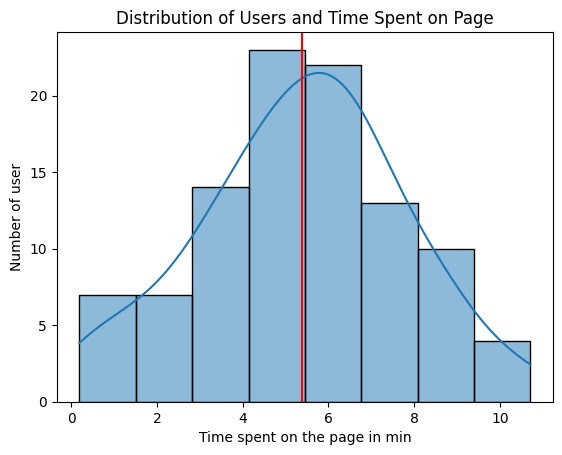

In [18]:
sns.histplot(data=abtest, x="time_spent_on_the_page",kde = True)
plt.axvline(abtest["time_spent_on_the_page"].mean(), color = "red")
plt.title("Distribution of Users and Time Spent on Page")
plt.xlabel("Time spent on the page in min")
plt.ylabel("Number of user")
plt.show();

### Obeservation
Time spent on the page is normally distributed across its mean of spend 5.38.

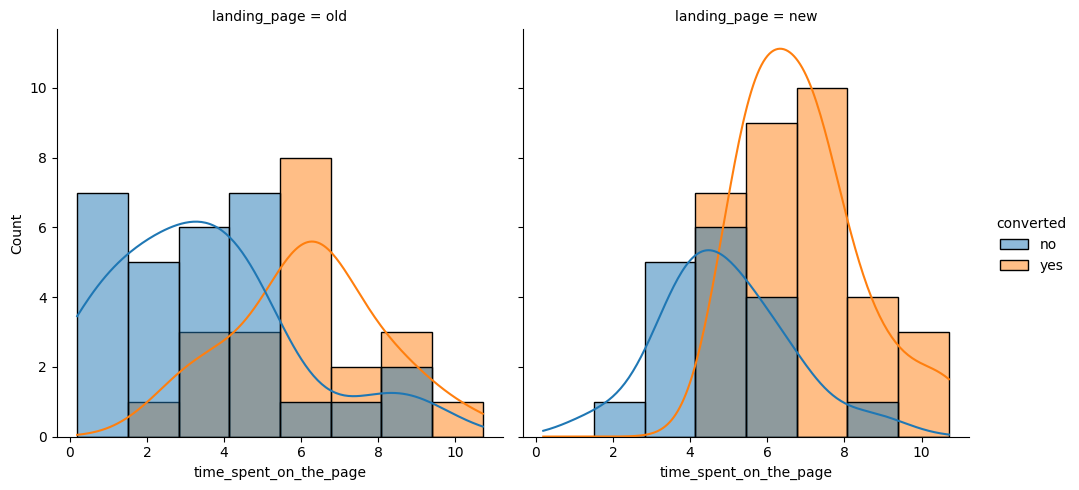

In [19]:

sns.displot(data=abtest, x='time_spent_on_the_page', hue='converted', col='landing_page', kind='hist', kde=True)
plt.show();

### Observation
Time spend in new page is more and conversation rate also increase in new landing page as compare to old one.

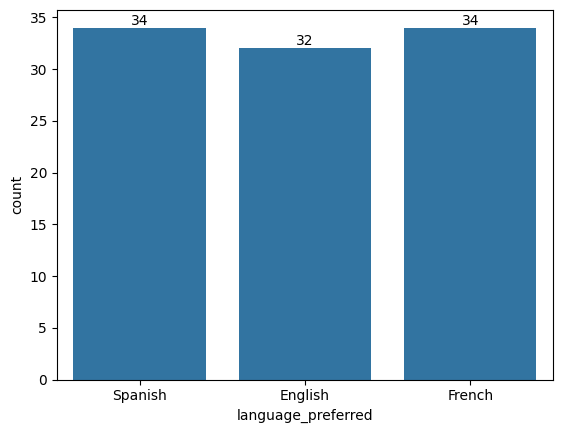

In [20]:
sns.countplot(data=abtest, x= "language_preferred")
# Add labels on each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height,  # Y position: at the top of the bar
        int(height),  # The label (converting height to int for cleaner display)
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.show();

In [21]:
abtest['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


### Observation

There are 3 unique language(Spanish, French, English) preferred by user.


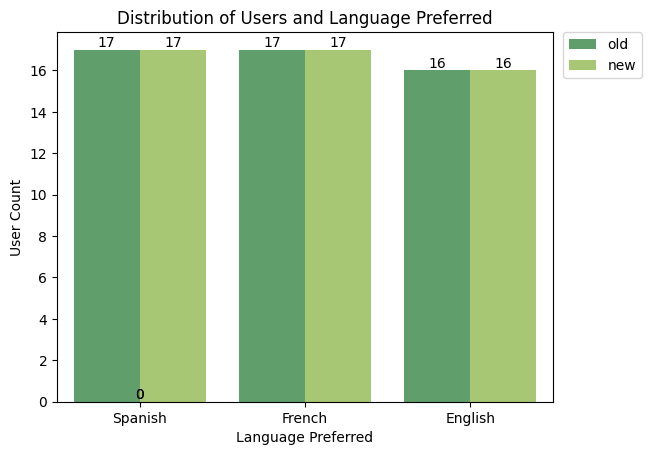

In [22]:
sns.countplot(data=abtest, x ='language_preferred',hue='landing_page',palette='summer',order=abtest['language_preferred'].value_counts().index)
# Add labels on each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height,  # Y position: at the top of the bar
        int(height),  # The label (converting height to int for cleaner display)
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title("Distribution of Users and Language Preferred")
plt.xlabel('Language Preferred')
plt.ylabel('User Count')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [23]:
abtest.groupby(['language_preferred'])['converted'].value_counts(normalize=True)*100

language_preferred  converted
English             yes         65.62
                    no          34.38
French              no          55.88
                    yes         44.12
Spanish             yes         52.94
                    no          47.06
Name: proportion, dtype: float64

### Observation
- 65% of user who preferred english are converted into subscribers.
- 52.9% of user who preferred Spanish are converted into subscribers.
- 44.1% of user who preferred French are converted into subscribers.

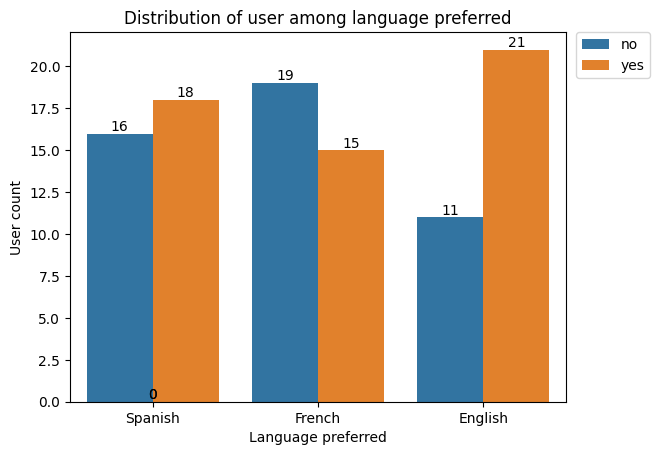

In [24]:
sns.countplot(data=abtest, x ="language_preferred", hue = "converted", order=abtest["language_preferred"].value_counts().index)
# Add labels on each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height,  # Y position: at the top of the bar
        int(height),  # The label (converting height to int for cleaner display)
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title("Distribution of user among language preferred")
plt.xlabel("Language preferred")
plt.ylabel("User count")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

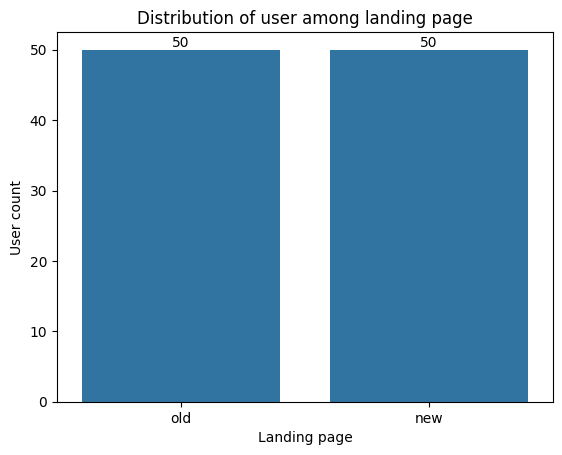

In [25]:
sns.countplot(data=abtest, x ="landing_page")
# Add labels on each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height,  # Y position: at the top of the bar
        int(height),  # The label (converting height to int for cleaner display)
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title("Distribution of user among landing page")
plt.xlabel("Landing page")
plt.ylabel("User count")
plt.show();

In [26]:
abtest.groupby(['landing_page'])['converted'].value_counts(normalize=True)*100

landing_page  converted
new           yes         66.00
              no          34.00
old           no          58.00
              yes         42.00
Name: proportion, dtype: float64

### Observation

- 66% of user, who use new landing page are converted into subscriber.
- 42% of user, who use old landing page are converted into subscriber.
- Therefore, their is an incresed in subscriber who landing on new page.

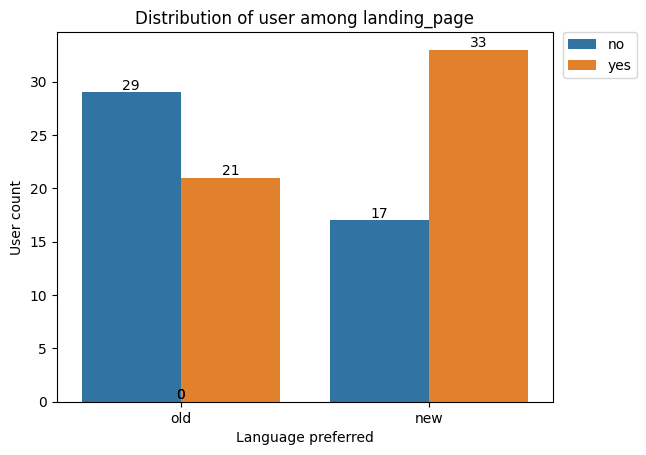

In [27]:
sns.countplot(data=abtest, x ="landing_page", hue = "converted", order=abtest["landing_page"].value_counts().index)
# Add labels on each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height,  # Y position: at the top of the bar
        int(height),  # The label (converting height to int for cleaner display)
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title("Distribution of user among landing_page")
plt.xlabel("Language preferred")
plt.ylabel("User count")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [28]:
abtest["group"].value_counts()

,count
group,
control,50
treatment,50


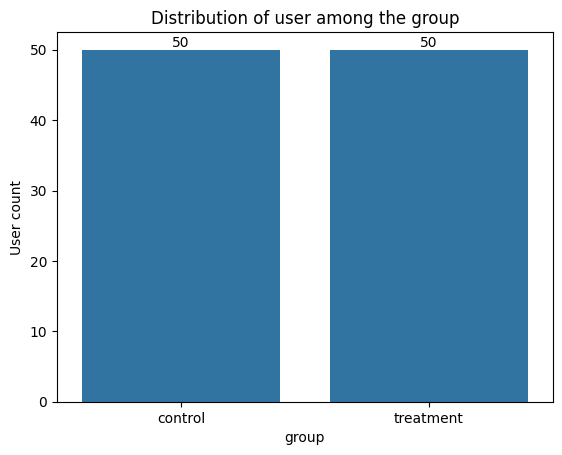

In [29]:
sns.countplot(data=abtest, x ="group")
# Add labels on each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height,  # Y position: at the top of the bar
        int(height),  # The label (converting height to int for cleaner display)
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title("Distribution of user among the group")
plt.xlabel("group")
plt.ylabel("User count")
plt.show();

In [30]:
abtest.groupby(['group'])['converted'].value_counts(normalize=True)*100

group      converted
control    no          58.00
           yes         42.00
treatment  yes         66.00
           no          34.00
Name: proportion, dtype: float64

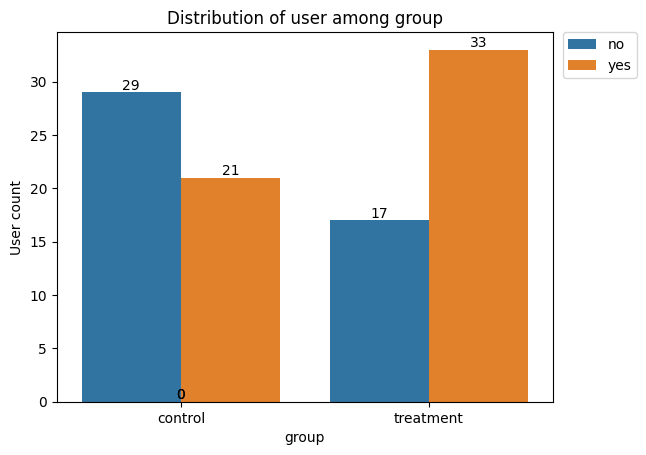

In [31]:
sns.countplot(data=abtest, x ="group", hue = "converted", order=abtest["group"].value_counts().index)
# Add labels on each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height,  # Y position: at the top of the bar
        int(height),  # The label (converting height to int for cleaner display)
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title("Distribution of user among group")
plt.xlabel("group")
plt.ylabel("User count")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### Observation
- On comparing the number of users who got converted to subscribers, the New landing page has 66% of its visitors turned into subscribers but the old landing page has only 42% of them.
-It is observed that users of the Treatment group get converted to subscribers at a higher rate than the users of the control group.

- This is the expected result as the groups correspond to the different versions of landing pages and the results are similar to that of the landing page.

In [32]:
abtest['converted'].value_counts()

,count
converted,
yes,54
no,46


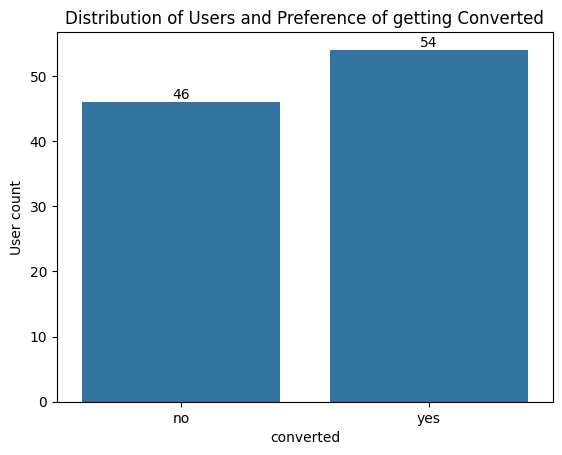

In [33]:
sns.countplot(data=abtest, x ="converted")
# Add labels on each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height,  # Y position: at the top of the bar
        int(height),  # The label (converting height to int for cleaner display)
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title("Distribution of Users and Preference of getting Converted")
plt.xlabel("converted")
plt.ylabel("User count")
plt.show();

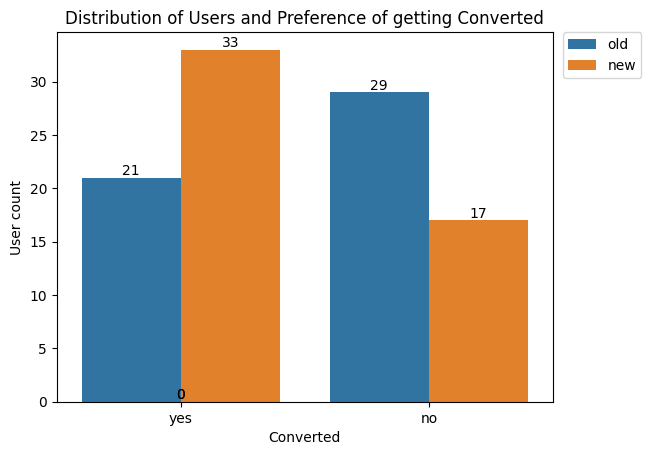

In [34]:
sns.countplot(data=abtest, x ="converted", hue = "landing_page", order=abtest["converted"].value_counts().index)
# Add labels on each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height,  # Y position: at the top of the bar
        int(height),  # The label (converting height to int for cleaner display)
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title("Distribution of Users and Preference of getting Converted")
plt.xlabel("Converted")
plt.ylabel("User count")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### Observation
- 33 out of 50 are user are become subscribers who use new landing page.

## Bivariate Analysis

<ipython-input-35-4378e430821f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= abtest, x="landing_page", y="time_spent_on_the_page", hue = "converted",ci=None)


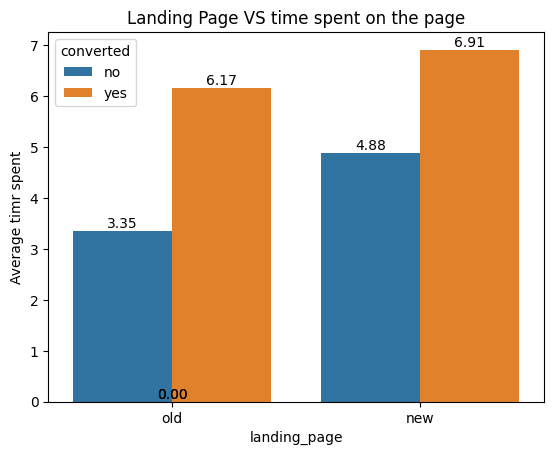

In [35]:
sns.barplot(data= abtest, x="landing_page", y="time_spent_on_the_page", hue = "converted",ci=None)
# Add labels on each bar with two decimal places
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height,  # Y position: at the top of the bar
        f'{height:.2f}',  # The label formatted to two decimal places
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title("Landing Page VS time spent on the page")
plt.xlabel("landing_page")
plt.ylabel("Average timr spent")
plt.show();

### Observations

The average time spent by visitors who got converted to subscribers is around 6-7 minutes for both landing pages.

The average time spent by users who got converted to subscribers is higher than the average time spent by users who did not get converted to subscribers.

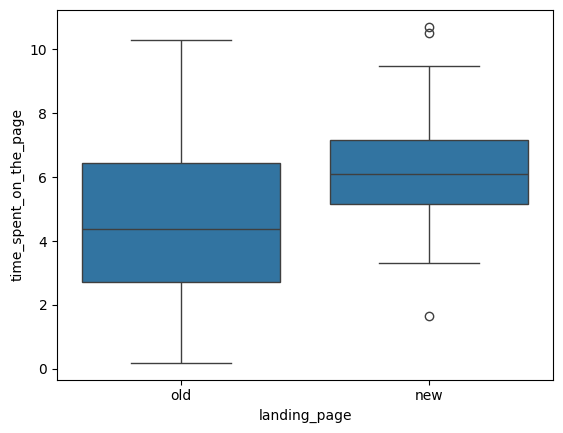

In [36]:
sns.boxplot(data=abtest,x='landing_page',y='time_spent_on_the_page')
plt.show();

### Observations

- There are no outliers in the time spent on the old landing page, but it is somewhat biased to the right.

- Few outliers exist when it comes to the amount of time spent on a new landing page, but the box plot's tight region suggests that the data have little variability or dispersion.



<ipython-input-37-d801f86dfc4c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= abtest, x="language_preferred", y="time_spent_on_the_page", hue = "converted",ci=None)


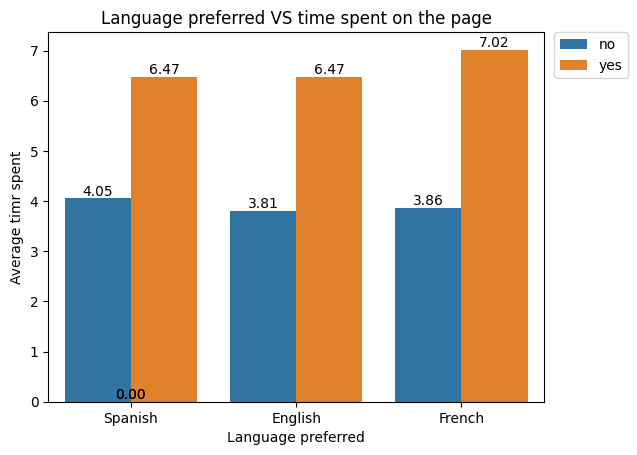

In [37]:
sns.barplot(data= abtest, x="language_preferred", y="time_spent_on_the_page", hue = "converted",ci=None)
# Add labels on each bar with two decimal places
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height,  # Y position: at the top of the bar
        f'{height:.2f}',  # The label formatted to two decimal places
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title("Language preferred VS time spent on the page")
plt.xlabel("Language preferred")
plt.ylabel("Average timr spent")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show();

In [38]:
abtest.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,5.56
French,5.25
Spanish,5.33


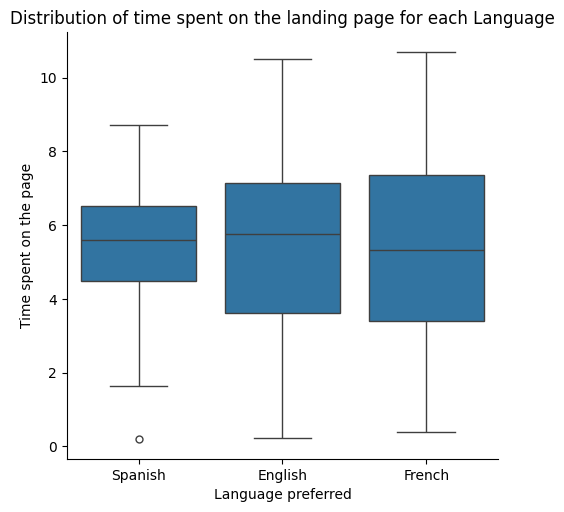

In [39]:
sns.catplot(data=abtest,x='language_preferred',y='time_spent_on_the_page', kind='box')
plt.title("Distribution of time spent on the landing page for each Language")
plt.xlabel('Language preferred')
plt.ylabel('Time spent on the page')
plt.show();

<ipython-input-40-6278036a2754>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=abtest, x='language_preferred', y='time_spent_on_the_page', hue='converted', col='landing_page', kind='bar', palette='summer',ci=None,edgecolor='black')


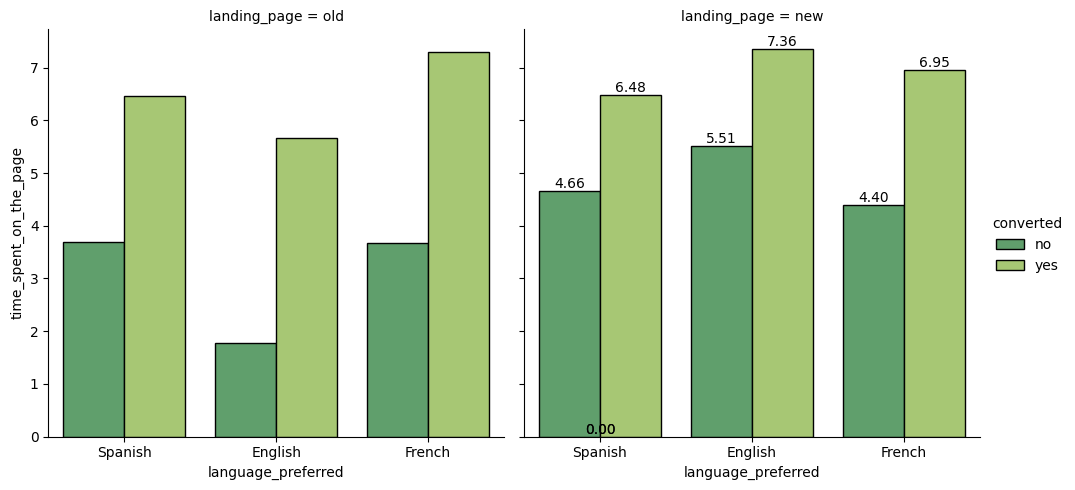

In [40]:
sns.catplot(data=abtest, x='language_preferred', y='time_spent_on_the_page', hue='converted', col='landing_page', kind='bar', palette='summer',ci=None,edgecolor='black')
# Add labels on each bar with two decimal places
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height,  # Y position: at the top of the bar
        f'{height:.2f}',  # The label formatted to two decimal places
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )


### Observation
- Users who converted to subscribers and preferred to read in Spanish spent an average of 6.5 minutes on both landing pages.

- In comparison to the average time spent (7.4 minutes) by English readers who converted to subscribers on the new website, the average time spent (5.7 minutes) by users who chose to read in English and who converted to subscribers on the previous page is a little low.

- When compared to the average time (6.9 minutes) spent by French users who converted to subscribers on the new website, the average time spent by those users on the previous page (7.3 minutes) is a little bit higher.

- When compared to people who did not subscribe, users of both landing pages who converted to subscribers generally spent more time on the page on average.

In [41]:
abtest.groupby(['converted'])['time_spent_on_the_page'].mean()

,time_spent_on_the_page
converted,
no,3.92
yes,6.62


Text(0, 0.5, 'Time spend on the landing page')

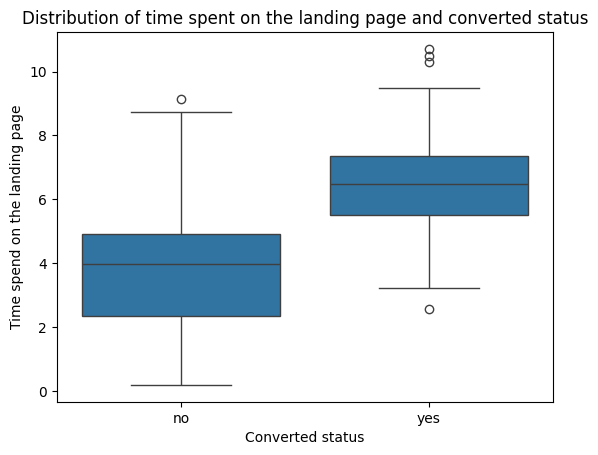

In [42]:
sns.boxplot(data=abtest, x="converted", y="time_spent_on_the_page")
plt.title("Distribution of time spent on the landing page and converted status")
plt.xlabel("Converted status")
plt.ylabel("Time spend on the landing page")

### Observations

- The box plot for the users who got converted indicates a high average time spent on the page compared to the users who did not get converted to subscribers.

- Box plots of both conversion status indicate presence of outliers.

<ipython-input-43-f98121b321bc>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=abtest, x='converted', y='time_spent_on_the_page',hue="landing_page", kind='bar', palette='summer',ci=None,edgecolor='black')


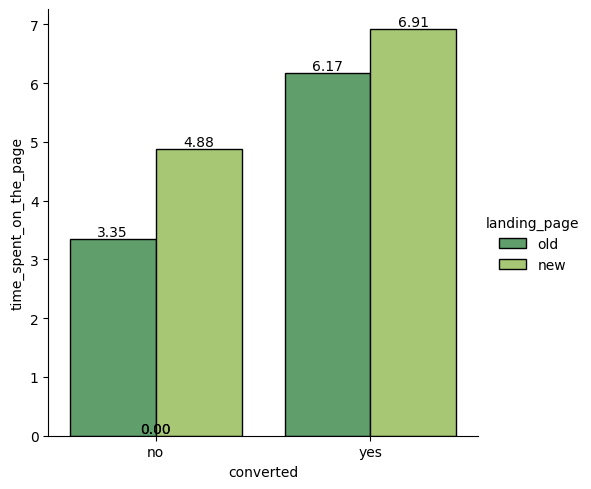

In [43]:
sns.catplot(data=abtest, x='converted', y='time_spent_on_the_page',hue="landing_page", kind='bar', palette='summer',ci=None,edgecolor='black')
# Add labels on each bar with two decimal places
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height,  # Y position: at the top of the bar
        f'{height:.2f}',  # The label formatted to two decimal places
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )

plt.show();

### Observation
- Users who converted to subscribers spent an average of six to seven minutes on both the old and new pages.

- Compared to those who were not converted, those who became subscribers spent a higher amount of time on average.

In [44]:
abtest.groupby(['landing_page', 'language_preferred', 'converted']).size().reset_index(name='count')

,landing_page,language_preferred,converted,count
0,new,English,no,6
1,new,English,yes,10
2,new,French,no,5
3,new,French,yes,12
4,new,Spanish,no,6
5,new,Spanish,yes,11
6,old,English,no,5
7,old,English,yes,11
8,old,French,no,14
9,old,French,yes,3


<ipython-input-45-5573f7ec8d98>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=abtest, x='language_preferred',hue='converted', col='landing_page', kind='count', palette='summer',ci=None,edgecolor='black')


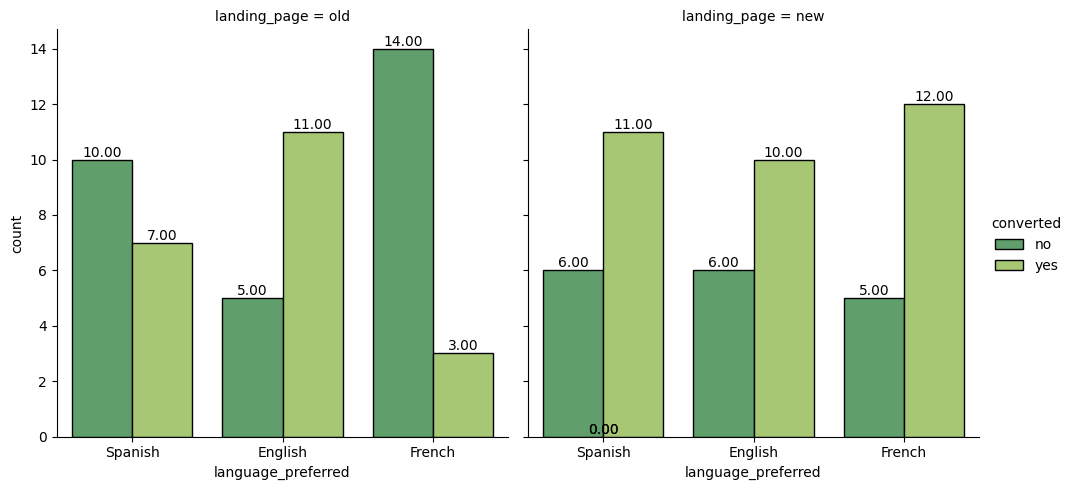

In [45]:
sns.catplot(data=abtest, x='language_preferred',hue='converted', col='landing_page', kind='count', palette='summer',ci=None,edgecolor='black')
# Add labels on each bar for both graphs
for ax in plt.gcf().axes:  # Loop through each subplot
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,  # X position: center of the bar
            height,  # Y position: at the top of the bar
            f'{height:.2f}',  # The label formatted to two decimal places
            ha='center',  # Horizontal alignment
            va='bottom'   # Vertical alignment
        )

plt.show();

### Observation
- Compared to users of the previous landing page, Spanish and French users of the new landing page had a higher count for their converted status of "yes."

- For both the old and new landing pages, the proportion of English users who have converted to 'yes' is nearly constant.

- We also note that, across all languages on the new landing page, the number of users with the conversion status "yes" is nearly constant.

## Q1. Do the users spend more time on the new landing page than on the existing landing page?

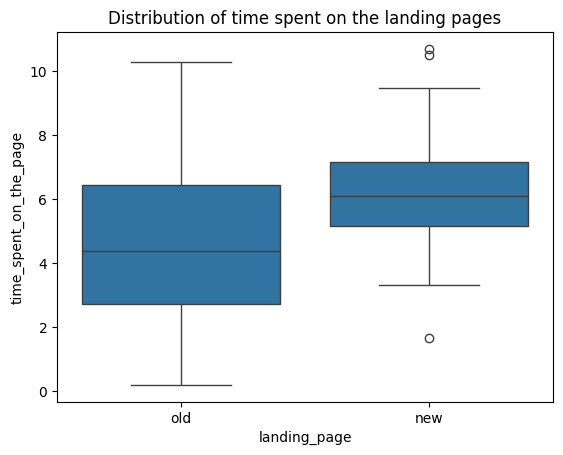

In [47]:
sns.boxplot(data=abtest, x="landing_page", y="time_spent_on_the_page")
plt.title("Distribution of time spent on the landing pages")
plt.show()

### Observation
Old Landing Page:
The box plot of the old landing page indicates the distribution is slightly skewed to the right.

There are no outliers.

The wide box plot of the old page indicates a large spread of data being plotted.

Time spent on the old landing page ranges from 0.19 seconds to 10.3 minutes.

New Landing Page

The box plot of the new landing page indicates a normal distribution with data concentrated in a smaller range of values.

We can observe outliers on both ends of the box plot.

Time spent on the new landing page ranges from 1.65 seconds to 10.71 minutes.

<ipython-input-53-f01a4dd5a0fb>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=abtest, x="landing_page", y="time_spent_on_the_page",palette='summer',ci=None)
<ipython-input-53-f01a4dd5a0fb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=abtest, x="landing_page", y="time_spent_on_the_page",palette='summer',ci=None)


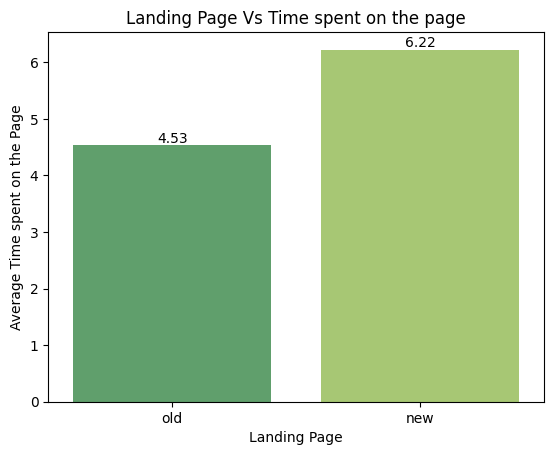

In [53]:
sns.barplot(data=abtest, x="landing_page", y="time_spent_on_the_page",palette='summer',ci=None)
# Add labels on each bar with two decimal places
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # X position: center of the bar
        height,  # Y position: at the top of the bar
        f'{height:.2f}',  # The label formatted to two decimal places
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title('Landing Page Vs Time spent on the page')
plt.xlabel('Landing Page')
plt.ylabel('Average Time spent on the Page')
plt.show()

### Observation
The average Time spent on the old page is 4.53 minutes and that of the new page is 6.22 minutes.

The average time spent on the new page is higher than on the old page.

# Step 1: Define the null and alternate hypotheses:

H0: The mean time spent by the users on the new page is less or equal to the mean time spent by the users on the old page.

Ha: The mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

### Step 2: Select the appropriate test

A two-sample independent t-test would be the most appropriate because it has two population means from two independent populations and the standard deviations are unknown.

α = 0.05 is given.


### Step 3 Collect and prepare data

In [56]:
# create subsetted data frame for new landing page users
time_spent_new = abtest[abtest['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = abtest[abtest['landing_page'] == 'old']['time_spent_on_the_page']


In [64]:
print(f'The mean and sample standard deviation of the time spent on the new page is: {round(time_spent_new.mean(),2)} and {round(time_spent_new.std(),2)}')
print(f'The mean and sample standard deviation of the time spent on the old page is: {round(time_spent_old.mean(),2)} and {round(time_spent_old.std(),2)}')

The mean and sample standard deviation of the time spent on the new page is: 6.22 and 1.82
The mean and sample standard deviation of the time spent on the old page is: 4.53 and 2.58


### Step 4: Calculate the p-value

In [65]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(time_spent_new,time_spent_old, equal_var = False, alternative = "greater")
print("The p vale :", p_value)

The p vale : 0.0001392381225166549


### Step 5: Compare the p vale with α

In [67]:
if p_value < 0.05:
  print(f'The p value {p_value} is less the alph (level of significance), we reject the null hypothesis.')
else:
  print(f'The p value {p_value} is greater the alph (level of significance), we fail to reject the null hypothesis.')

The p value 0.0001392381225166549 is less the alph (level of significance), we reject the null hypothesis.


### Step 6 Draw Inference

The p vale (0.000139) is less then α (0.05), therefore we reject the null hypothesis.

We have enough evidence to say that user spend more time on the new landing page than on the existing landing page.

#### Q2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

<ipython-input-75-30531249c48b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=abtest, x= "converted", col="landing_page", kind = "count",palette='summer',ci=None)
<ipython-input-75-30531249c48b>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=abtest, x= "converted", col="landing_page", kind = "count",palette='summer',ci=None)


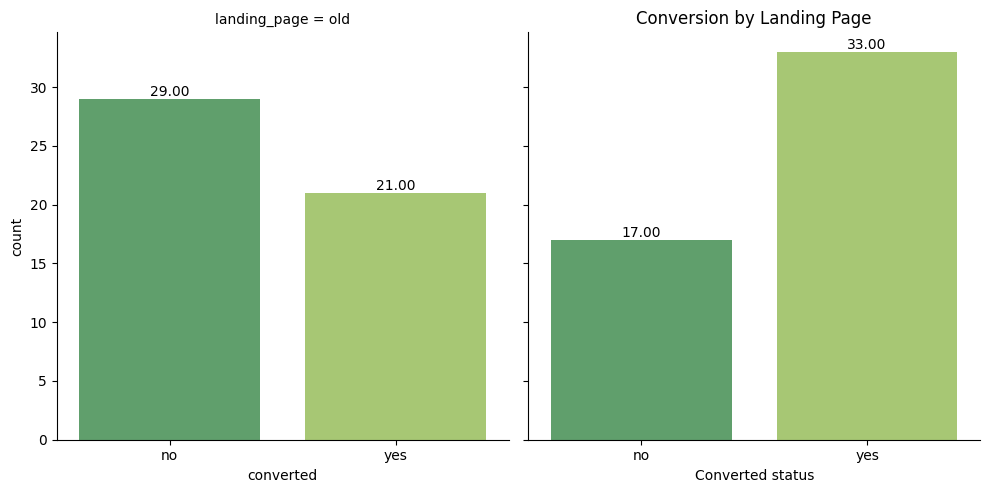

In [75]:
sns.catplot(data=abtest, x= "converted", col="landing_page", kind = "count",palette='summer',ci=None)
# Add labels on each bar for both graphs
for ax in plt.gcf().axes:  # Loop through each subplot
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,  # X position: center of the bar
            height,  # Y position: at the top of the bar
            f'{height:.2f}',  # The label formatted to two decimal places
            ha='center',  # Horizontal alignment
            va='bottom'   # Vertical alignment
        )
plt.title("Conversion by Landing Page")
plt.xlabel("Converted status")
plt.ylabel("Count")
plt.show();

### Observations
- Old Landing page: 21 out of 50 user are converted into subscribers model.
- New Landing page: 33 out of 50 user are converted into subscribers model.

### Step 1: Define the null and alternate hypotheses


H0: The conversion rate of the new page is less and equal to the conversion rate of the old page.

Ha: The conversion rate of the new page is greater than the conversion rate of the old page.

### Step 2: Select Appropriate test
This is a one-tailed test concerning two population proportions from two independent populations. Based on this information, a two proportion z-test would be the most appropriate.

α = 0.05 is given

### Step 3: Collect and prepare data

In [79]:
# calculate the number of converted users in the treatment and control groups
new_converted = abtest[abtest['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = abtest[abtest['group'] == 'control']['converted'].value_counts()['yes']

#total number of users in the treatment and control groups
n_treatment = abtest.group.value_counts()['treatment']
n_control = abtest.group.value_counts()['control']

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


Two-proportion z-test assumptions:
- Binomally distributed population - Yes, a user is either converted or not converted.
- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
- Can the binomial distribution approximated to normal distribution - Yes.

### Step 4: Calculate the p-value

In [81]:
# Perform a two-proportion z-test and determine the p-value
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')

print('The p-value is', p_value)

The p-value is 0.008026308204056278


Step 5: Compare the p-value with  α

In [82]:
# print the conclusion based on p-value
if p_value < 0.05:
  print(f'The p value {p_value} is less the alph (level of significance), we reject the null hypothesis.')
else:
  print(f'The p value {p_value} is greater the alph (level of significance), we fail to reject the null hypothesis.')

The p value 0.008026308204056278 is less the alph (level of significance), we reject the null hypothesis.


### Step 6: Draw inference

The p value 0.008026308204056278 is less the α (level of significance), we reject the null hypothesis. This means that their is significant evidence that the conversion rate of the new page is greater than the conversion rate of the old page.




#### Q3. Does the converted status depend on the preferred language?

<ipython-input-86-9eaf795c386c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=abtest, x='converted',col='language_preferred',  kind='count', palette='summer',ci=None,edgecolor='black')
<ipython-input-86-9eaf795c386c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=abtest, x='converted',col='language_preferred',  kind='count', palette='summer',ci=None,edgecolor='black')


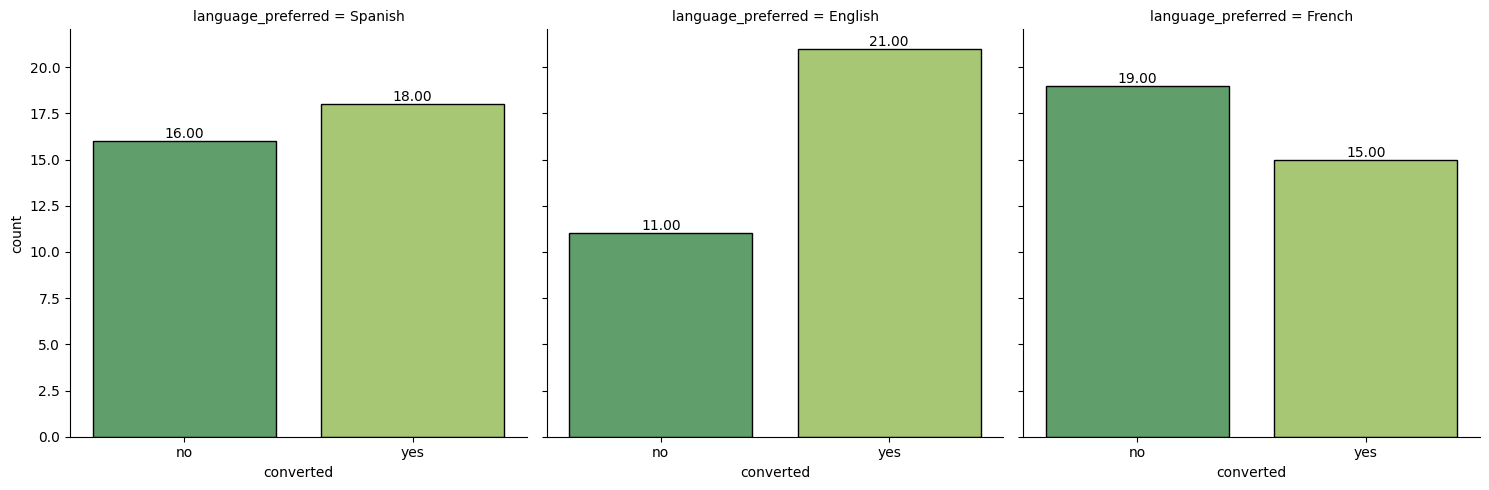

In [86]:
sns.catplot(data=abtest, x='converted',col='language_preferred',  kind='count', palette='summer',ci=None,edgecolor='black')
# Add labels on each bar for both graphs
for ax in plt.gcf().axes:  # Loop through each subplot
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,  # X position: center of the bar
            height,  # Y position: at the top of the bar
            f'{height:.2f}',  # The label formatted to two decimal places
            ha='center',  # Horizontal alignment
            va='bottom'   # Vertical alignment
        )

plt.show();

### Observation

English has the highest conversion rate. Few converted in Spanish but in French, their is some decreased in conversion rate.

### Step 1: Define the null and alternate hypotheses

H0:The converted status is independent of the preferred language.

Ha:The converted status is dependent of the preferred language.

### Step 2: Select Appropriate test
This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. Based on this information, a chi-square test for independence would be the most approriate.

 α = 0.05 is given

###Step 3: Collect and prepare data

In [88]:
# Create contingency table for the converted and language_preferred variables
contingency_table = pd.crosstab(abtest['language_preferred'], abtest['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


Chi-Squared test for independence assumptions:
- Categorical variables - Yes
- Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 4: Calculate the p-value

In [89]:
# Perform a chi-squared test for independence and determine the p-value
from scipy.stats import chi2_contingency

chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 5: Compare the p-value with α

In [90]:
if p_value < 0.05:
  print(f'The p value {p_value} is less the alph (level of significance), we reject the null hypothesis.')
else:
  print(f'The p value {p_value} is greater the alph (level of significance), we fail to reject the null hypothesis.')

The p value 0.2129888748754345 is greater the alph (level of significance), we fail to reject the null hypothesis.


### Step 6: Draw inference

The p value 0.2129888748754345 is greater the alph (level of significance), we fail to reject the null hypothesis.

This means that that the converted status is independent of the preferred language.



### Q4. Is the time spent on the new page same for the different language users?

In [95]:
# create a new DataFrame for users who got served the new page
abtest_new = abtest[abtest['landing_page'] == 'new']
abtest_new.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


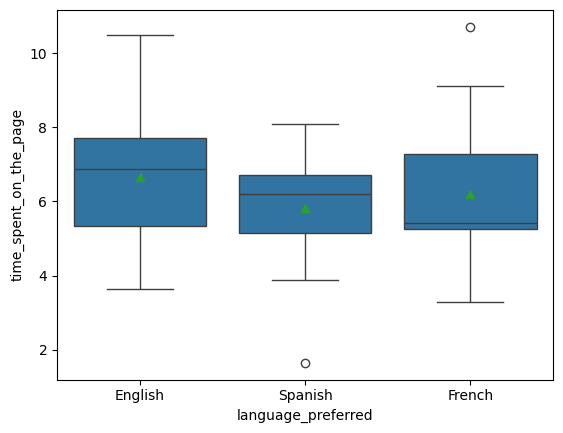

In [96]:
# Visualize the time spent on the new page for different language users
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = abtest_new)
plt.show()

In [98]:
# Returns the mean of time spent on landing pages for different languages
print(abtest.groupby('language_preferred')['time_spent_on_the_page'].mean())

language_preferred
English   5.56
French    5.25
Spanish   5.33
Name: time_spent_on_the_page, dtype: float64


### Observations

Oultiers are spotted for Spanish.

The average time spent on the landing page is almost equal for all three languages.

###Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

H0: The mean time spent on the new landing page for all three languages are all equal.

against the alternate hypothesis

Ha: The mean time spent on the new landing page for at least one of the three languages is different.


### Step 2: Select Appropriate test

The test is concerned with comparing the means of more than two groups.

A One-way ANOVA F-test would be an appropriate test to perform.

α = 0.05 given

###Step 3: Collect and prepare data

Normality - Shapiro-Wilk’s test
We will test the null hypothesis
H0: Time spent on the landing page follows a normal distribution

against the alternative hypothesis

Ha:Time spent on the landing page does not follow a normal distribution

The shapiro() function of Scipy will be used to compute the test statistic and p-value.

In [99]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
statistic, p_value  = stats.shapiro(abtest[abtest['landing_page']=='new']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040040364746845


The p-value (0.8040040364746845) is greater than the level of significance (0.05) and we, therefore, fail to reject the null hypothesis.

At a 5% significance level, we conclude that time spent on the landing page follows a normal distribution.

### Equality - Levene’s test
We will test the null hypothesis

 H0: All the population variances are equal

against the alternative hypothesis

 Ha: At least one variance is different from the rest

The levene() function of Scipy will be used to compute the test statistic and p-value

In [101]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(       abtest[(abtest['landing_page'] == 'new') & (abtest['language_preferred'] == 'Spanish')]['time_spent_on_the_page'],
                                   abtest[(abtest['landing_page'] == 'new') & (abtest['language_preferred'] == 'French')]['time_spent_on_the_page'],
                                   abtest[(abtest['landing_page'] == 'new') & (abtest['language_preferred'] == 'English')]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


The p-value (0.46711357711340173) is greater than the level of significance (0.05) and we, therefore, fail to reject the null hypothesis.

At a 5% significance level, we conclude that variances of all the variables are equal

Let's test whether the assumptions are satisfied or not
- The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
- Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
- Population variances are equal - Yes, the homogeneity of variance assumption is verified using Levene's test.
All our assumptions are satisfied. We can use One-way ANOVA F-test for this problem.

The f_oneway() function of Scipy will be used to compute the test statistic and p-value.

### Step 4: Calculate the p-value

In [102]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(abtest[(abtest['landing_page'] == 'new') & (abtest['language_preferred'] == 'Spanish')]['time_spent_on_the_page'],
                              abtest[(abtest['landing_page'] == 'new') & (abtest['language_preferred'] == 'French')]['time_spent_on_the_page'],
                              abtest[(abtest['landing_page'] == 'new') & (abtest['language_preferred'] == 'English')]['time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 5: Compare the p-value with α

In [103]:
if p_value < 0.05:
  print(f'The p value {p_value} is less the alph (level of significance), we reject the null hypothesis.')
else:
  print(f'The p value {p_value} is greater the alph (level of significance), we fail to reject the null hypothesis.')

The p value 0.43204138694325955 is greater the alph (level of significance), we fail to reject the null hypothesis.


### Step 6: Draw inference
The p-value (0.43204138694325955 ) is greater than the level of significance (0.05) and we, therefore, fail to reject the null hypothesis.

we conclude that the mean time spent on the new landing page for all three languages are all equal.


## Conclusion and Business Recommendations

### Observations

- The average time spent on the landing page and the user's language preference on reading the landing page is the possible factors influencing the page's visitors to become subscribers.

- Regardless of the user's choice language, the new landing page has a higher mean time spent than the old one.

- Compared to the previous landing page, the new landing page has a greater conversion rate of visitors who become subscribers.

- On the new landing page, there is a noticeable increase in the conversion rate for users who are Spanish and French speakers, but the conversion rate for English users stays about the same on both sites.

- Because the converted status is independent of the users' preferred language, the average amount of time spent on the landing page determines whether or not the status is converted.

- All three languages spend the same amount of time on the new landing page on average.


### Conclusion

- Introducing the new landing page will drive business growth and attract more subscribers to the online news portal.
- Language preference does not impact the conversion rate.
- The amount of time spent on the landing page affects the likelihood of a visitor converting to a subscriber.


### Recommendations


- Additionally, analyzing and offering the landing page in some of the most popular languages worldwide could attract a broader audience to the new portal, thereby increasing the potential for new subscribers.
- It is important for the visitors reading the page to spend a reasonable amount of time and consider the information we provide valuable.
- To increase the average time spent on the page and boost the likelihood of visitors becoming subscribers, we recommend keeping the content concise and to the point, incorporating high-quality images, and using appropriate font sizes.






